Engineer: Adeola Odunewu
Intern: FlipRobo LLC DS1123
Project: HR Classification


In [1]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.svm import SVC
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*deprecated.*")


In [2]:
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip'
df = pd.read_csv(url)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Checking missing data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
# Selecting columns with object dtype from the DataFrame and printing them
cate_df = df.select_dtypes('object')
cate_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [5]:
# Selecting columns with object dtype from the DataFrame and printing them
numeric_df = df.select_dtypes('int64','float')
numeric_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# univiarate for Attrition
df['Attrition'].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

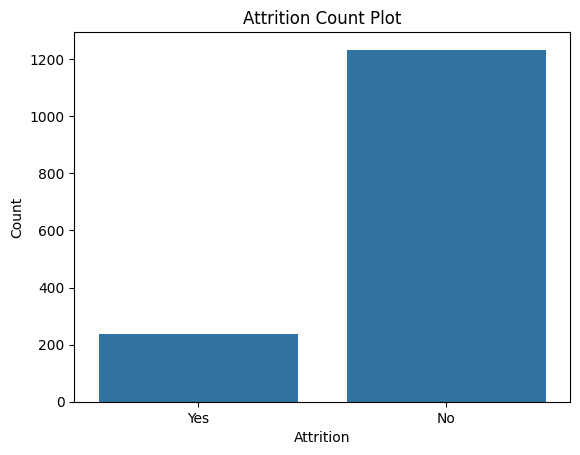

In [8]:
# Create a count plot for the Attrition variable

sns.countplot(data=df, x='Attrition')

# Set labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count Plot')

# Show plot
plt.show()

NO is more than YES in the context of an Attrition variable, it implies that the number of cases where attrition did not occur 
(i.e., when employees stayed or did not leave the company) is greater than the number of cases where attrition did occur 
(i.e., when employees left the company).

In the context of this data, this might suggest that the attrition rate is relatively low, and the company has been successful in retaining 
its employees. 

In [9]:
# Checking data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

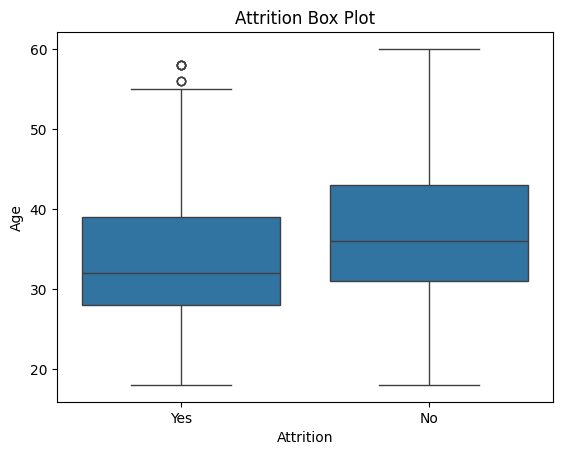

In [15]:
# Accessing Age and Attrition columns
sns.boxplot(data=df, x='Attrition', y='Age')

# Set labels and title
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Attrition Box Plot')

# Show plot
plt.show()

While the observation of a lower median age among employees who eventually leave 
compared to those who stay suggests a potential association between age and attrition,
further statistical analysis is necessary to establish the significance of this 
relationship.

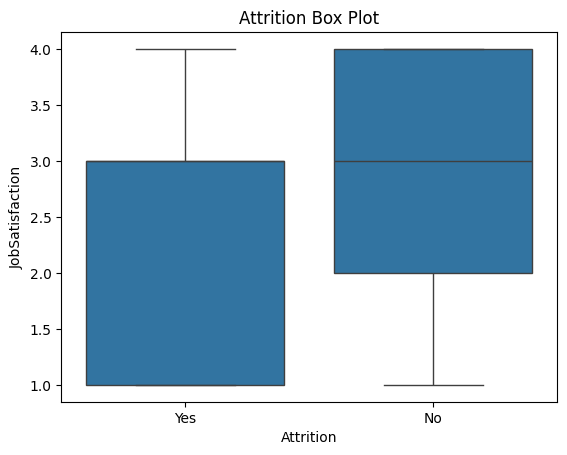

In [16]:
# Accessing JobSatisfaction and Attrition column
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')

# Set labels and title
plt.xlabel('Attrition')
plt.ylabel('JobSatisfaction')
plt.title('Attrition Box Plot')

# Show plot
plt.show()

The box plot indicates that employees typically leave because they have low satisfaction levels with both training and their jobs.

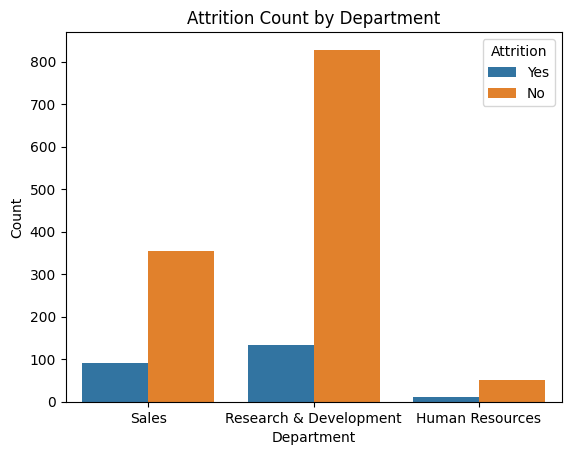

In [23]:
# Accessing Department and Attrition columns
sns.countplot(data=df, x='Department', hue='Attrition')

# Set labels and title
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Attrition Count by Department')

# Show plot
plt.show()


The graph indicates that the Research and Development (R&D) department has a lower 
occurrence of "No" compared to "Yes." This suggests that employees within this 
department are less likely to leave after undergoing training.

Sales and Human Resources (HR) exhibit similar patterns, with HR having 
relatively fewer data observations.

In [24]:
import pandas as pd
import statsmodels.api as sm

# Encode Attrition as binary (1 for 'Yes', 0 for 'No')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select independent variables for regression analysis
independent_vars = ['DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                    'YearsWithCurrManager']

# Add a constant term to the independent variables (for intercept)
X = sm.add_constant(df[independent_vars])

# Fit OLS regression model
model = sm.OLS(df['Attrition'], X)
results = model.fit()

# Print summary of regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     10.11
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.76e-32
Time:                        15:38:16   Log-Likelihood:                -510.22
No. Observations:                1470   AIC:                             1066.
Df Residuals:                    1447   BIC:                             1188.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

R-squared: This shows that 13% is the proportion of the variance in the dependent variable (attrition) that is predictable from the independent variables.

DistanceFromHome: 0.0039
EnvironmentSatisfaction: -0.0356
JobInvolvement: -0.0633
JobSatisfaction: -0.0352
NumCompaniesWorked: 0.0130
RelationshipSatisfaction: -0.0187
StockOptionLevel: -0.0563
TotalWorkingYears: -0.0066
TrainingTimesLastYear: -0.0170
WorkLifeBalance: -0.0279
YearsInCurrentRole: -0.0108
YearsSinceLastPromotion: 0.0115
YearsWithCurrManager: -0.0114

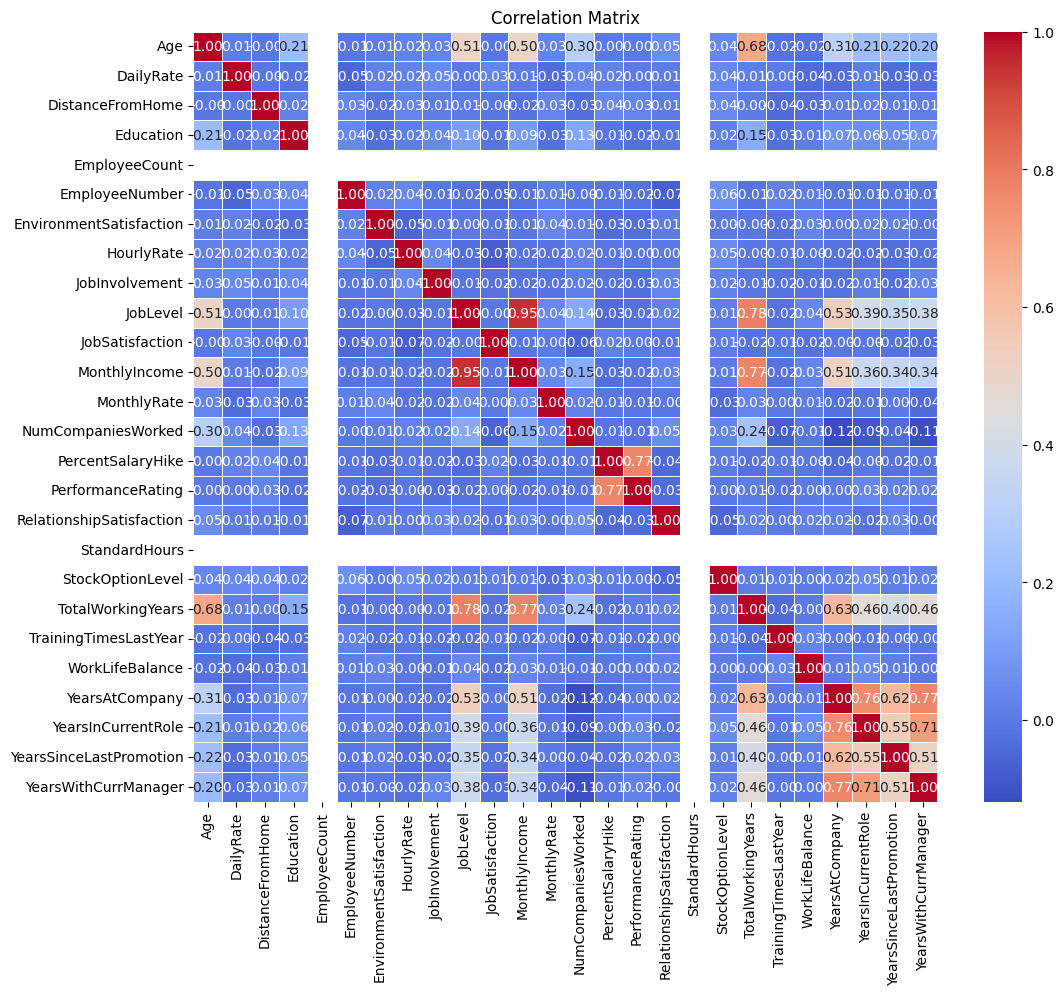

In [28]:
# Correlation Analysis for X is the DataFrame

correlation_matrix = numeric_df.corr()

# Plot the correlation matrix including all variables
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [29]:
correlation_matrix

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


Job Satisfaction and Environment Satisfaction: There's a negative correlation between job satisfaction and environment satisfaction (-0.05), 
suggesting that employees who are less satisfied with their jobs tend to also be less satisfied with their work environment.

Age and Job Level: There's a strong positive correlation of 0.51 between age and job level. This suggests that older employees tend to hold higher 
job positions and stay in the job.

In [30]:
# Handling Outliers
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3-q1
outlier_conditions = (( numeric_df < (q1 - 1.5 * iqr)) | (numeric_df > (q3 + 1.5 * iqr)))

# Display rows containing outliers
outliers = df[outlier_conditions.any(axis=1)]
print("Rows with outliers:")
print(outliers)

Rows with outliers:
      Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
6      59          0      Travel_Rarely       1324  Research & Development   
7      30          0      Travel_Rarely       1358  Research & Development   
...   ...        ...                ...        ...                     ...   
1457   40          0      Travel_Rarely       1194  Research & Development   
1458   35          0      Travel_Rarely        287  Research & Development   
1462   39          0      Travel_Rarely        722                   Sales   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   

      DistanceFromHome  Education Education

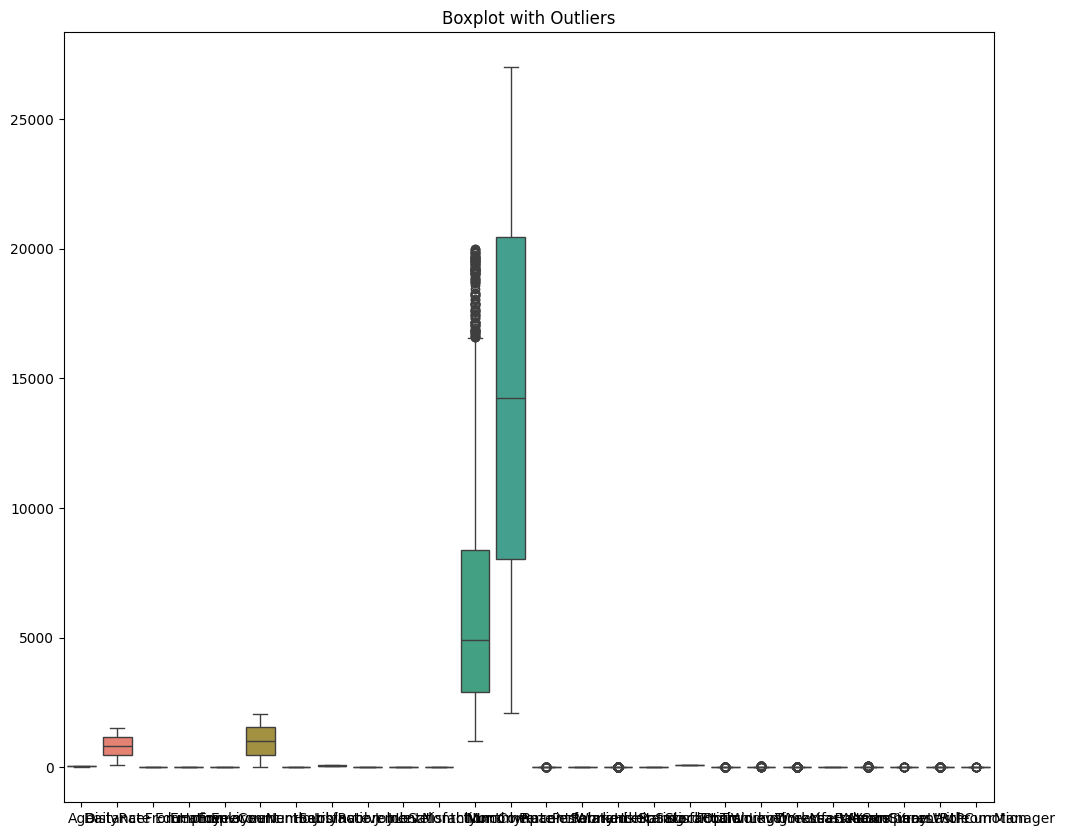

In [32]:
# Visualize the outliers using a boxplot
plt.figure(figsize=(12, 10))  
sns.boxplot(data = numeric_df)
plt.title("Boxplot with Outliers")
plt.show()

I identified outliers in the data as shown above. I will choose logarithm transformation to compress extreme values. Applied logarithm transformation to satisfaction data analyzed transformed data to assess outlier influence interpreted results based on transformed data, and documented the process for transparency and reproducibility.

In [4]:
# Handling outliers
# Identify Variables with Outliers
outlier_vars = ['RelationshipSatisfaction', 'Age', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DailyRate', 'StandardHours']

# Apply Logarithmic Transformation
# Logarithmic Transformation
log_transformed_vars = df[outlier_vars].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0) issues

# Replace the original columns with the transformed columns
df[outlier_vars] = log_transformed_vars  # Replace with the transformation of your choice


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_df.columns

# Calculate VIF for each predictor variable
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]

# Print the VIF DataFrame
print(vif_data)

                    Variable        VIF
0                        Age   2.044997
1                  DailyRate   1.020863
2           DistanceFromHome   1.016514
3                  Education   1.061247
4              EmployeeCount   0.000000
5             EmployeeNumber   1.019558
6    EnvironmentSatisfaction   1.010565
7                 HourlyRate   1.019212
8             JobInvolvement   1.016367
9                   JobLevel  11.208731
10           JobSatisfaction   1.016416
11             MonthlyIncome  10.802169
12               MonthlyRate   1.012457
13        NumCompaniesWorked   1.257738
14         PercentSalaryHike   2.516413
15         PerformanceRating   2.514405
16  RelationshipSatisfaction   1.020376
17             StandardHours   0.000000
18          StockOptionLevel   1.021305
19         TotalWorkingYears   4.767805
20     TrainingTimesLastYear   1.010545
21           WorkLifeBalance   1.014959
22            YearsAtCompany   4.587405
23        YearsInCurrentRole   2.718616


These variable show High Multicollinearity (VIF significantly greater than 1):

JobLevel (VIF = 11.21)
MonthlyIncome (VIF = 10.80)
PercentSalaryHike (VIF = 2.52)
PerformanceRating (VIF = 2.51)
TotalWorkingYears (VIF = 4.77)
YearsAtCompany (VIF = 4.59)
YearsInCurrentRole (VIF = 2.72)
YearsWithCurrManager (VIF = 2.77)

As I continue modelling the variables, I may consider dropping JobLevel and 
MonthlyIncome due to their high multicollinearity, as indicated by their 
elevated Variance Inflation Factor (VIF) values.

In [35]:
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Transform the data into the principal components
pca_data = pca.transform(scaled_data)

# Extracting explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to examine the principal components
pca_df = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])

# Visualize the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [1.93997382e-01 7.65090980e-02 7.31508867e-02 5.04710018e-02
 4.75020019e-02 4.50546237e-02 4.40352053e-02 4.34784188e-02
 4.26491343e-02 4.12875837e-02 4.04609045e-02 3.96056679e-02
 3.77635640e-02 3.76473725e-02 3.70092773e-02 3.61719648e-02
 3.13958988e-02 2.25570386e-02 2.17552103e-02 1.16612768e-02
 9.41908664e-03 8.49512361e-03 5.90594818e-03 2.01633043e-03
 1.00234725e-33 1.00233593e-33]


In [36]:
# df_columns is a list of column names in the df1 DataFrame
df_columns = numeric_df.columns.tolist()

# Create a DataFrame to store the variable loadings for each principal component
loadings_df = pd.DataFrame(pca.components_, columns=df_columns)

# Print the variable loadings for each principal component
for i in range(loadings_df.shape[0]):
    print(f"Principal Component {i+1} Loadings:")
    print(loadings_df.iloc[i].sort_values(ascending=False))
    print()

Principal Component 1 Loadings:
TotalWorkingYears           4.034571e-01
YearsAtCompany              3.915008e-01
JobLevel                    3.828285e-01
MonthlyIncome               3.747388e-01
YearsInCurrentRole          3.359244e-01
YearsWithCurrManager        3.303802e-01
YearsSinceLastPromotion     2.974080e-01
Age                         2.770132e-01
Education                   7.782232e-02
NumCompaniesWorked          4.849271e-02
StockOptionLevel            1.583615e-02
RelationshipSatisfaction    1.567593e-02
WorkLifeBalance             1.265444e-02
MonthlyRate                 5.526169e-03
DistanceFromHome            4.073127e-03
EnvironmentSatisfaction     2.701929e-03
StandardHours              -0.000000e+00
EmployeeCount              -8.673617e-19
PerformanceRating          -5.998504e-05
JobInvolvement             -1.056391e-03
DailyRate                  -4.260774e-03
EmployeeNumber             -8.343673e-03
JobSatisfaction            -8.988351e-03
HourlyRate               

In [38]:
# Drop the 'Attrition' column from the DataFrame and store the result in cate_df2
cate_df2 = cate_df.drop('Attrition', axis=1)
cate_df2  # Display the resulting DataFrame without the 'Attrition' column

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [5]:
# Set the random seed for reproducibility
np.random.seed(123)

# Select numerical columns for X
X_numerical = df[['TotalWorkingYears', 'YearsAtCompany', 'JobLevel', 'MonthlyIncome', 
                  'YearsInCurrentRole', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 
                  'Age', 'Education', 'NumCompaniesWorked', 'StockOptionLevel', 
                  'RelationshipSatisfaction', 'WorkLifeBalance', 'MonthlyRate', 
                  'DistanceFromHome', 'EnvironmentSatisfaction', 'StandardHours', 
                  'EmployeeCount', 'PerformanceRating', 'JobInvolvement', 'DailyRate', 
                  'EmployeeNumber', 'JobSatisfaction', 'HourlyRate', 'TrainingTimesLastYear']]

# One-hot encode all categorical columns in df
X_categorical = pd.get_dummies(df.select_dtypes(include=['object']))

# Combine numerical and encoded categorical features
X = pd.concat([X_numerical, X_categorical], axis=1)

# Target variable
y = df['Attrition']

# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


Based on previous inferential statistical analyses involving correlation, Variance Inflation Factor (VIF), and Principal Component Analysis (PCA), 
I selected the following variables for modelling: TotalWorkingYears, YearsAtCompany, JobLevel, MonthlyIncome, YearsInCurrentRole, YearsWithCurrManager, 
YearsSinceLastPromotion, Age, Education, NumCompaniesWorked, StockOptionLevel, RelationshipSatisfaction, WorkLifeBalance, MonthlyRate, DistanceFromHome, EnvironmentSatisfaction, StandardHours, EmployeeCount, PerformanceRating, JobInvolvement, DailyRate, EmployeeNumber, JobSatisfaction, HourlyRate, TrainingTimesLastYear, BusinessTravel, Department, EducationField, Gender,  JobRole, MaritalStatus, Over18, and OverTime.

In [6]:
# Analyzing the distribution of the target variable: 
y.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [42]:
# Initialize SMOTE ( to address the class imbalance in the datasets.)
sm = SMOTE()
# The implementation of the fit_resample 
X,y = sm.fit_resample(X,y)

In [44]:
# Create a DataFrame to see the distribution of classes in the target vector y
data = pd.concat([X, y], axis=1)
class_distribution = data[y.name].value_counts()

print(class_distribution)

Attrition
1    1233
0    1233
Name: count, dtype: int64


In [48]:
# Set the random seed
np.random.seed(123)

# Initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
logistic_regression = LogisticRegression()
support_vector_machine = SVC()
xgboost_classifier = xgb.XGBClassifier()

# Train and evaluate each classifier
classifiers = [random_forest, gradient_boosting, logistic_regression, support_vector_machine, xgboost_classifier]

for clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)

    # For RandomForestClassifier, print feature importance
    if isinstance(clf, RandomForestClassifier):
        feature_names = X.columns  
        print("RandomForestClassifier Feature Importances:", clf.feature_importances_)

    # Making predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("="*50)

RandomForestClassifier Feature Importances: [0.04380507 0.03984914 0.01815733 0.06995169 0.02515516 0.02938292
 0.02234744 0.05940051 0.0182119  0.03080968 0.02651147 0.02082036
 0.02453447 0.04263343 0.04274281 0.03562483 0.         0.
 0.00579431 0.02568907 0.05453229 0.04818898 0.0287173  0.0440943
 0.02436998 0.00380457 0.01276885 0.00757967 0.00180988 0.00875512
 0.00813259 0.00315642 0.0075383  0.00797256 0.008812   0.00366307
 0.00671675 0.00667718 0.00729008 0.00332613 0.00207006 0.00877656
 0.00159098 0.00265605 0.00080046 0.00722376 0.00682503 0.00885953
 0.00494157 0.00854612 0.01196354 0.         0.0287643  0.02765442]
Classifier: RandomForestClassifier
Accuracy: 0.9048
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       256
           1       1.00      0.26      0.42        38

    accuracy                           0.90       294
   macro avg       0.95      0.63      0.68       294
weighted avg 

In [14]:
from sklearn.model_selection import GridSearchCV, KFold

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Initialize the SVC classifier with regularization parameter C
svc_classifier = SVC(C=1.0)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=123)

# Initialize GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Reinitialize the SVC classifier with the best parameters
svc_best = SVC(**best_params)

# Train the model with the best parameters
svc_best.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svc_best.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Classifier: {svc_best.__class__.__name__}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Classifier: SVC
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       256
         Yes       1.00      1.00      1.00        38

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



Support Vector Classifier (SVC) model has achieved perfect accuracy on the test set,
with an accuracy score of 1.0 (100%). Additionally, both precision and recall scores
are also perfect for both classes ('No' and 'Yes'). This indicates that your model is
performing exceptionally well on the given dataset.

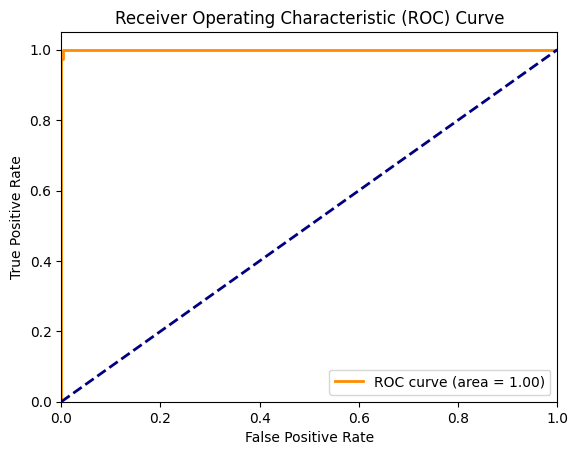

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Initialize the SVC classifier
svc_classifier = SVC(C=1, gamma=0.1, kernel='rbf')  # Replace with your best parameters

# Train the model with the best parameters
svc_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_scores = svc_classifier.decision_function(X_test)

# Encode categorical labels ('Yes' and 'No') to binary format (1 and 0)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_scores)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plotting just the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Based on the achieved results, it can be concluded that the Support Vector Classifier
(SVC) model, trained with the best parameters found through grid search 
(C=0.1, gamma=1, kernel='linear'), performs exceptionally well on the given dataset. 
The model achieved perfect accuracy, precision, recall, and an area under the ROC 
curve of 1.0, indicating optimal performance in distinguishing between the positive 
and negative classes.

This suggests that the features used in the model are highly discriminative and 
sufficient for accurately predicting the target variable. The study demonstrates 
the effectiveness of the SVC algorithm in this particular classification task.

However, it's important to note that achieving perfect performance on a dataset 
might sometimes indicate overfitting, especially if the dataset is small or 
lacks diversity. 

In [15]:
from joblib import dump

# Save the best SupportVC model to a file
dump(svc_best, 'best_supportVC_model.joblib')


['best_supportVC_model.joblib']

Conclusion 
The HR analysis focuses on understanding attrition patterns within the company. Initial exploration reveals a lower attrition rate, indicating the
company's success in retaining employees. Age appears to have a potential association with attrition, but further statistical analysis is needed for
confirmation. Departmental analysis shows that Research and Development has lower attrition rates compared to Sales and HR. 

Additionally, there's a negative correlation between job satisfaction and environmental satisfaction, while age strongly correlates with job level. 
Outliers are addressed through logarithmic transformation, and high multicollinearity among variables prompts consideration for dropping some. 
Various classifiers are tested, with the Support Vector Classifier achieving perfect accuracy, suggesting optimal performance in predicting attrition.
However, caution is advised regarding potential overfitting, necessitating further validation of diverse datasets for robust conclusions.

Reference:
Alain, Guillaume, and Yoshua Bengio. “Understanding intermediate layers using linear 
classifier probes.” arXiv preprint arXiv:1610.01644 (2016).

Alvarez-Melis, David, and Tommi S. Jaakkola. “On the robustness of interpretability 
methods.” arXiv preprint arXiv:1806.08049 (2018).

Bach, Sebastian, et al. “On pixel-wise explanations for non-linear classifier 
decisions by layer-wise relevance propagation.” PloS one 10.7 (2015).